In [2]:
from keras.applications.vgg16 import VGG16

# Load the VGG16 model 
# VGG-16 is a convolutional neural network model that is 16 layers deep and expect input images of size 224x224 with 3 color channels (RGB).
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 289s 1us/step


In [3]:
model.summary()  # Display the model architecture

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

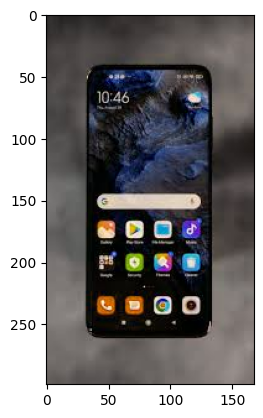

In [10]:
from keras.preprocessing.image import load_img 
from keras.applications.vgg16 import preprocess_input
import numpy as np 
import cv2
from matplotlib.pyplot import imshow

image = load_img('phone.jpg', target_size=(224, 224))
image = np.array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare image for the VGG Model
image = preprocess_input(image)
image

my_image = cv2.imread('phone.jpg')
imshow(my_image)


In [11]:
yhat = model.predict(image)
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[8.83834232e-08, 6.07439176e-07, 3.79113665e-08, 9.93836835e-09,
        2.90141973e-08, 1.35782770e-07, 4.51746516e-08, 3.25181901e-07,
        1.23934592e-06, 2.87885371e-07, 1.18294679e-07, 1.95707031e-07,
        1.21415962e-06, 2.35252131e-07, 1.58724504e-07, 5.46624108e-07,
        2.99018694e-07, 1.98807740e-07, 2.26602538e-07, 2.45976594e-07,
        9.16624643e-08, 1.49114413e-07, 2.09628467e-07, 2.91330537e-07,
        8.96226197e-07, 6.43445162e-07, 1.70352322e-07, 1.97623251e-07,
        6.20830292e-07, 3.47362601e-07, 1.40488879e-07, 2.15607301e-07,
        6.24954737e-07, 1.47051662e-06, 3.63418565e-07, 7.18497006e-07,
        1.43499801e-06, 2.24671612e-06, 3.52766705e-08, 1.05092035e-07,
        1.43856980e-07, 7.82805358e-08, 4.51083395e-07, 3.22622668e-07,
        2.31329196e-07, 2.48640890e-06, 7.29837168e-08, 1.69555690e-07,
        5.53887496e-08, 4.61967716e-07, 1.89501861e-07, 1.85663609e-08,
        2.87590353e-07, 8.80264793e-07, 5.35391337e-07, 7.039059

In [12]:
# Convert the probabilities to class label
from keras.applications.vgg16 import preprocess_input, decode_predictions
label = decode_predictions(yhat)
label

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step


[[('n03584254', 'iPod', 0.91433346),
  ('n02992529', 'cellular_telephone', 0.0382886),
  ('n04074963', 'remote_control', 0.012374552),
  ('n03485407', 'hand-held_computer', 0.0068636015),
  ('n03871628', 'packet', 0.0027264473)]]